In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

# data

create a dummy graph

In [2]:
# initialie features , dimension ; 16
embeddings = torch.rand((100, 16), dtype=torch.float)

In [3]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor((rows, cols))

In [4]:
edges

tensor([[ 5, 43,  5, 49, 97, 26, 43, 71, 44, 46, 94, 66, 62, 30, 41,  2,  6, 34,
         34, 92, 80, 33, 62, 33, 62, 18,  5, 95, 49, 33, 45, 22, 36,  2, 25, 84,
         71, 97, 60, 20, 23, 72, 23, 58, 92, 14, 55, 38, 85, 61,  2, 82, 50, 93,
          3, 25, 60, 37, 43, 11, 24, 30, 83, 88, 15, 30, 11, 22,  1, 33, 72, 50,
          8, 34, 14, 32, 61, 51, 84, 52, 14, 50, 79, 98, 60, 87, 10, 44, 93, 64,
         42, 38, 59, 20, 11,  4, 33, 34,  5,  9, 35, 13, 89, 90, 70, 66,  2, 49,
         33, 39, 36, 38, 49, 68, 54, 76,  6, 25, 38, 23, 85, 64,  5, 48, 97, 62,
         97, 30, 94, 66, 66, 87,  3, 41, 85, 31, 83,  6, 42, 57, 94, 30, 84, 57,
         97, 20,  6, 12, 61, 14,  0, 21, 47, 93, 74,  7, 33, 45, 79, 93, 93, 18,
         42, 31, 56, 32, 20, 74,  6, 75, 51, 31,  8,  9, 89, 86, 23, 81, 12, 54,
         33,  7, 40, 56, 25, 47, 95, 92, 22, 26, 38, 18, 98, 73,  4, 21,  7, 65,
         86, 31, 37,  7, 28, 81, 51, 31,  2, 84, 38, 78, 88, 50, 35, 72, 29, 39,
         51, 61, 92,  0, 15,

In [5]:
# before we create the graph which is consists 500 x 500
# this step is generating the features to substitute the features 
# for example , edges[0] ; 96 - 42 -> edge(relationship) has '1' feature
edges_attr = np.random.choice(3, 500)

In [6]:
edges_attr

array([0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2,
       2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0,
       0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0,

In [7]:
# label
ys = torch.randn((100)).round().long()

In [8]:
ys

tensor([ 2,  1,  1,  0,  1,  0,  0,  1,  1, -1,  0,  1,  0, -3, -1,  1,  0, -1,
        -1,  0,  0,  0, -2,  0,  0,  0,  0, -1, -1, -2,  0,  0, -1, -1, -2, -1,
         1,  0, -1, -1,  0, -1,  0,  0, -2, -2, -1, -1,  0,  0,  0,  0,  1,  1,
         0, -1,  0,  2,  0,  0, -3,  1, -2,  0,  1,  1, -1,  2, -1,  0,  1,  0,
         1, -1, -1,  0,  1, -2, -2,  1,  0,  0, -1, -1,  1,  0, -1,  0,  0,  0,
         1, -1,  1, -1,  2, -1, -2, -1,  1,  1])

convert the graph information into a PyG Data object

In [9]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [10]:
graph

Data(edge_attr=[0 2 0 2 1 0 2 1 1 2 0 1 1 2 0 1 0 1 2 2 0 2 1 0 1 0 1 0 2 1 1 0 1 2 0 2 2
 0 0 1 2 1 2 0 1 1 0 0 1 1 1 0 1 0 0 2 0 1 0 0 0 2 1 0 1 0 2 2 2 2 2 2 2 0
 1 0 2 1 1 0 2 1 2 0 2 2 1 0 0 0 0 2 2 0 1 2 1 1 2 1 0 0 0 0 1 2 2 2 1 2 0
 1 2 2 1 1 2 2 0 2 1 1 2 0 1 2 0 0 2 2 0 1 2 0 1 0 0 2 1 1 2 0 1 1 2 2 1 2
 0 1 2 2 0 1 1 2 0 2 2 2 1 1 0 1 0 2 0 1 2 1 2 0 2 2 2 2 2 1 1 0 1 1 1 1 0
 2 2 0 1 0 0 0 2 1 0 1 0 2 1 2 0 2 0 0 0 2 2 2 2 0 2 2 2 0 0 2 1 0 1 2 2 0
 1 2 1 2 0 0 0 2 1 2 2 1 1 2 0 2 2 0 0 1 1 0 2 1 0 2 0 1 2 0 0 0 2 2 1 2 2
 1 0 0 1 2 2 1 1 2 1 2 2 1 2 0 1 0 0 2 0 1 0 0 1 2 2 0 0 1 2 0 0 0 1 2 1 2
 1 1 0 0 0 0 2 2 2 2 1 1 1 0 2 0 0 0 0 1 2 2 2 0 2 2 1 2 1 2 2 1 2 2 2 2 0
 0 1 1 1 2 1 2 2 1 2 1 1 2 0 2 0 2 2 2 1 1 2 0 0 2 1 1 2 1 0 0 1 1 0 1 2 2
 1 2 1 2 2 0 2 2 0 2 1 2 1 2 2 2 1 0 1 1 1 0 0 1 2 0 2 0 2 1 0 1 0 1 2 1 0
 2 1 2 2 1 0 1 0 1 0 2 2 0 2 0 2 2 1 1 2 2 0 1 0 2 0 1 2 1 0 2 0 2 0 0 2 1
 2 0 2 0 0 0 2 0 0 2 1 2 1 1 2 0 0 1 2 0 0 1 1 0 1 2 0 2 2 2 1 2 2 2 1 1 1
 1 1 0 0 2

visualize the informatin contained in the obejct

In [11]:
for prop in graph:
    print(prop)

('edge_attr', array([0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2,
       2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0,
       0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 

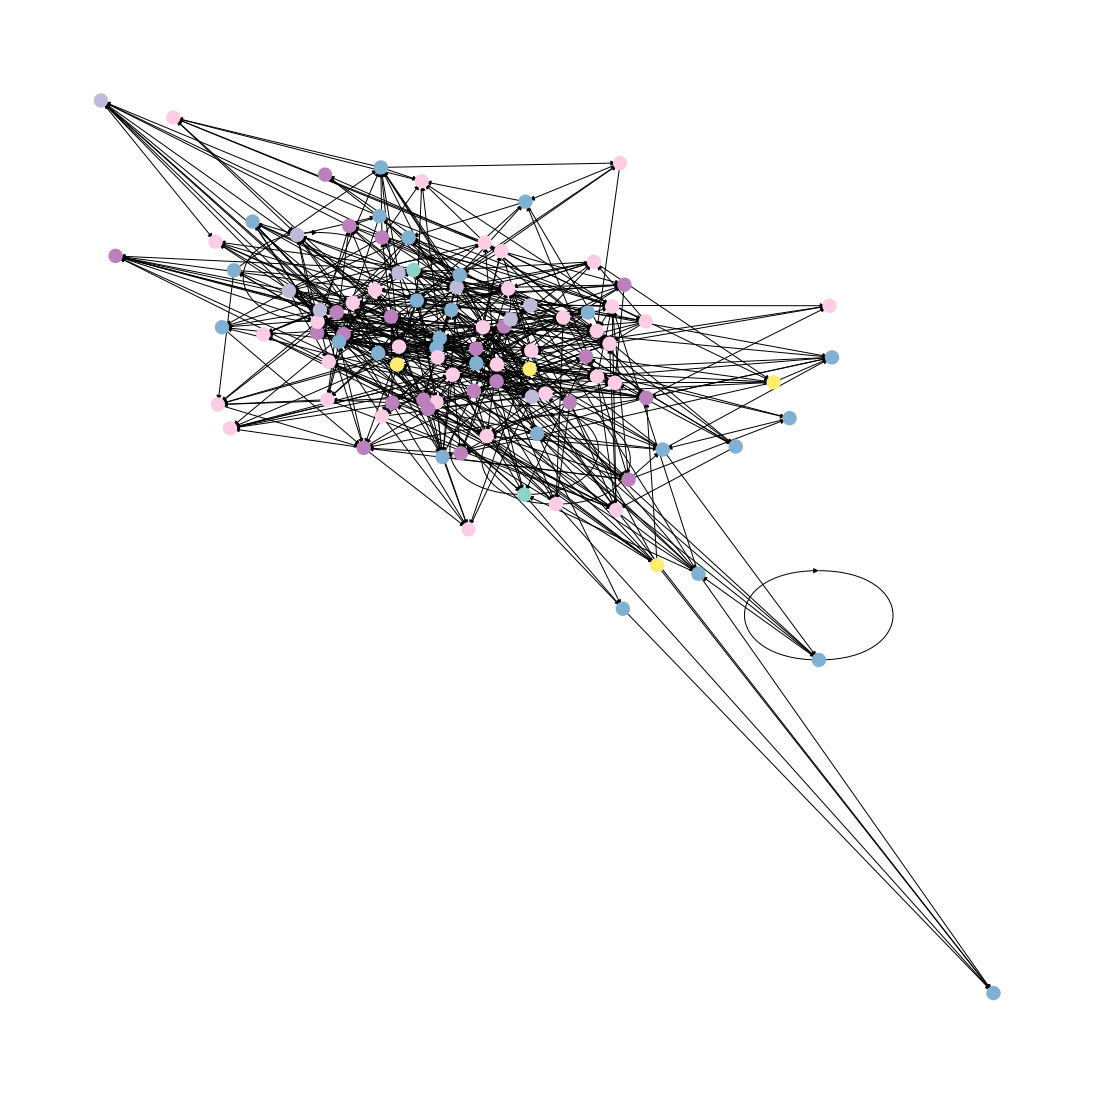

In [12]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
# plt.figure(figsize=(15,15))
plt.figure(1, figsize=(15,15))
nx.draw(vis,
       cmap=plt.get_cmap('Set3'),
       node_color=node_labels,
       node_size=70,
       linewidths=6)
plt.show()

# batch

with the batch object we can represent multiple graphs as a single disconnected graph

In [13]:
graph2 = graph

In [14]:
batch = data.Batch().from_data_list([graph, graph2])

In [15]:
print(f'Number of graphs: {batch.num_graphs} \n\n')
print(f'Graph at index 1: {batch[1]} \n\n ')
print(f'Retrieve the list of graphs: \n\n: {len(batch.to_data_list())}')

Number of graphs: 2 


Graph at index 1: Data(edge_attr=[0 2 0 2 1 0 2 1 1 2 0 1 1 2 0 1 0 1 2 2 0 2 1 0 1 0 1 0 2 1 1 0 1 2 0 2 2
 0 0 1 2 1 2 0 1 1 0 0 1 1 1 0 1 0 0 2 0 1 0 0 0 2 1 0 1 0 2 2 2 2 2 2 2 0
 1 0 2 1 1 0 2 1 2 0 2 2 1 0 0 0 0 2 2 0 1 2 1 1 2 1 0 0 0 0 1 2 2 2 1 2 0
 1 2 2 1 1 2 2 0 2 1 1 2 0 1 2 0 0 2 2 0 1 2 0 1 0 0 2 1 1 2 0 1 1 2 2 1 2
 0 1 2 2 0 1 1 2 0 2 2 2 1 1 0 1 0 2 0 1 2 1 2 0 2 2 2 2 2 1 1 0 1 1 1 1 0
 2 2 0 1 0 0 0 2 1 0 1 0 2 1 2 0 2 0 0 0 2 2 2 2 0 2 2 2 0 0 2 1 0 1 2 2 0
 1 2 1 2 0 0 0 2 1 2 2 1 1 2 0 2 2 0 0 1 1 0 2 1 0 2 0 1 2 0 0 0 2 2 1 2 2
 1 0 0 1 2 2 1 1 2 1 2 2 1 2 0 1 0 0 2 0 1 0 0 1 2 2 0 0 1 2 0 0 0 1 2 1 2
 1 1 0 0 0 0 2 2 2 2 1 1 1 0 2 0 0 0 0 1 2 2 2 0 2 2 1 2 1 2 2 1 2 2 2 2 0
 0 1 1 1 2 1 2 2 1 2 1 1 2 0 2 0 2 2 2 1 1 2 0 0 2 1 1 2 1 0 0 1 1 0 1 2 2
 1 2 1 2 2 0 2 2 0 2 1 2 1 2 2 2 1 0 1 1 1 0 0 1 2 0 2 0 2 1 0 1 0 1 2 1 0
 2 1 2 2 1 0 1 0 1 0 2 2 0 2 0 2 2 1 1 2 2 0 1 0 2 0 1 2 1 0 2 0 2 0 0 2 1
 2 0 2 0 0 0 2 0 0 2 1 2 1 1 2 0 0 1 2 0 0 1

In [16]:
batch[0]

Data(edge_attr=[0 2 0 2 1 0 2 1 1 2 0 1 1 2 0 1 0 1 2 2 0 2 1 0 1 0 1 0 2 1 1 0 1 2 0 2 2
 0 0 1 2 1 2 0 1 1 0 0 1 1 1 0 1 0 0 2 0 1 0 0 0 2 1 0 1 0 2 2 2 2 2 2 2 0
 1 0 2 1 1 0 2 1 2 0 2 2 1 0 0 0 0 2 2 0 1 2 1 1 2 1 0 0 0 0 1 2 2 2 1 2 0
 1 2 2 1 1 2 2 0 2 1 1 2 0 1 2 0 0 2 2 0 1 2 0 1 0 0 2 1 1 2 0 1 1 2 2 1 2
 0 1 2 2 0 1 1 2 0 2 2 2 1 1 0 1 0 2 0 1 2 1 2 0 2 2 2 2 2 1 1 0 1 1 1 1 0
 2 2 0 1 0 0 0 2 1 0 1 0 2 1 2 0 2 0 0 0 2 2 2 2 0 2 2 2 0 0 2 1 0 1 2 2 0
 1 2 1 2 0 0 0 2 1 2 2 1 1 2 0 2 2 0 0 1 1 0 2 1 0 2 0 1 2 0 0 0 2 2 1 2 2
 1 0 0 1 2 2 1 1 2 1 2 2 1 2 0 1 0 0 2 0 1 0 0 1 2 2 0 0 1 2 0 0 0 1 2 1 2
 1 1 0 0 0 0 2 2 2 2 1 1 1 0 2 0 0 0 0 1 2 2 2 0 2 2 1 2 1 2 2 1 2 2 2 2 0
 0 1 1 1 2 1 2 2 1 2 1 1 2 0 2 0 2 2 2 1 1 2 0 0 2 1 1 2 1 0 0 1 1 0 1 2 2
 1 2 1 2 2 0 2 2 0 2 1 2 1 2 2 2 1 0 1 1 1 0 0 1 2 0 2 0 2 1 0 1 0 1 2 1 0
 2 1 2 2 1 0 1 0 1 0 2 2 0 2 0 2 2 1 1 2 2 0 1 0 2 0 1 2 1 0 2 0 2 0 0 2 1
 2 0 2 0 0 0 2 0 0 2 1 2 1 1 2 0 0 1 2 0 0 1 1 0 1 2 0 2 2 2 1 2 2 2 1 1 1
 1 1 0 0 2

# Cluster

ClusterData groups the nodes of graph into a specific number of cluster for faster computation in large graphs, then use ClusterLoader to load batches of clutsers

# Sampler

For each convolutional layer, sample a maximum of nodes from each neighborhood (as in GraphSAGE)

In [17]:
# sizes argument indicates the neighborhoods range this cases utilize 3~10 neighborhood

'''
obj:`sizes` denotes how much neighbors we want to
sample for each node in each layer.
This module then takes in these :obj:`sizes` and iteratively samples
:obj:`sizes[l]` for each node involved in layer :obj:`l`.
In the next layer, sampling is repeated for the union of nodes that were
already encountered.
The actual computation graphs are then returned in reverse-mode, meaning
that we pass messages from a larger set of nodes to a smaller one, until we
reach the nodes for which we originally wanted to compute embeddings.
'''

sampler = data.NeighborSampler(graph.edge_index,
                              sizes=(3,10),
                              batch_size=4,
                              shuffle=False)

In [18]:
# aforementioned that the sampler class then we check the sampler results
# remember that we defined the sample size ( 3, 10 ) then we had 3 batches of neighbor.

for s in sampler:
    print(s)
    break

(4, tensor([ 0,  1,  2,  3, 32, 11, 20, 51, 30, 46, 45, 94, 98, 34, 97, 88, 73,  5,
         4, 54, 61, 22, 31, 41, 48, 93, 56, 49, 90, 33,  6, 38, 47, 86, 87, 91,
        83, 23, 44, 60, 72, 26, 57, 15, 67, 53, 50, 64, 24, 77, 63, 55, 39]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6, 15, 16,  7,  8,  5,  9, 10, 11, 14, 17, 18, 12, 13, 14, 16,
         19,  2, 14, 20, 21, 22, 23, 24, 10, 25, 26, 27, 28, 29, 30, 31, 32, 33,
          1, 15, 17, 20, 34, 35, 36, 37, 38, 39,  9, 14, 24, 24, 40, 41, 42,  2,
          2, 22, 25, 33, 43, 44,  7, 22, 45, 28, 46, 47, 11, 48, 10, 49, 50, 51,
         52,  7, 13, 25, 30, 31, 49],
        [ 0,  0,  0,  0,  0,  1,  1,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
          7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,
          9,  9,  9,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 13,
         13, 14, 14, 14, 14, 14, 14]]), e_id=tenso

In [19]:
# last sentences interpreting ( 76 , 12 ) is number of neighbors '3' multiplies * batch size '4' -> '12'
# if you graps this results then i ensure u this document is helpful the understanding
# https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html?highlight=sampler#torch_geometric.loader.NeighborSampler
'''
NeighborSampler module instruction

The neighbor sampler from the “Inductive Representation Learning on Large Graphs” paper, which allows for mini-batch training of GNNs on large-scale graphs where full-batch training is not feasible.

Given a GNN with  layers and a specific mini-batch of nodes node_idx for which we want to compute embeddings, this module iteratively samples neighbors and constructs bipartite graphs that simulate the actual computation flow of GNNs.

More specifically, sizes denotes how much neighbors we want to sample for each node in each layer. This module then takes in these sizes and iteratively samples sizes[l] for each node involved in layer l. In the next layer, sampling is repeated for the union of nodes that were already encountered. The actual computation graphs are then returned in reverse-mode, meaning that we pass messages from a larger set of nodes to a smaller one, until we reach the nodes for which we originally wanted to compute embeddings.

Hence, an item returned by NeighborSampler holds the current batch_size, the IDs n_id of all nodes involved in the computation, and a list of bipartite graph objects via the tuple (edge_index, e_id, size), where edge_index represents the bipartite edges between source and target nodes, e_id denotes the IDs of original edges in the full graph, and size holds the shape of the bipartite graph. For each bipartite graph, target nodes are also included at the beginning of the list of source nodes so that one can easily apply skip-connections or add self-loops.
'''


'''
pytorch-geometric talks this module'neighborSampler' is deprectated and will be removed in a futer releas .
Then they suggest the 'NeighborLoader' module and below things that summary

A data loader that performs neighbor sampling as introduced in the “Inductive Representation Learning on Large Graphs” paper. This loader allows for mini-batch training of GNNs on large-scale graphs where full-batch training is not feasible.

More specifically, num_neighbors denotes how much neighbors are sampled for each node in each iteration. NeighborLoader takes in this list of num_neighbors and iteratively samples num_neighbors[i] for each node involved in iteration i - 1.

Sampled nodes are sorted based on the order in which they were sampled. In particular, the first batch_size nodes represent the set of original mini-batch nodes.

from torch_geometric.datasets import Planetoid
from torch_geometric.loader import NeighborLoader

data = Planetoid(path, name='Cora')[0]

loader = NeighborLoader(
    data,
    # Sample 30 neighbors for each node for 2 iterations
    num_neighbors=[30] * 2,
    # Use a batch size of 128 for sampling training nodes
    batch_size=128,
    input_nodes: data.train_mask),
)

sampled_data = next(iter(loader))
print(sampled_data.batch_size)
>>> 128
By default, the data loader will only include the edges that were originally sampled (directed = True). This option should only be used in case the number of hops is equivalent to the number of GNN layers. In case the number of GNN layers is greater than the number of hops, consider setting directed = False, which will include all edges between all sampled nodes (but is slightly slower as a result).

Furthermore, NeighborLoader works for both homogeneous graphs stored via Data as well as heterogeneous graphs stored via HeteroData. When operating in heterogeneous graphs, more fine-grained control over the amount of sampled neighbors of individual edge types is possible, but not necessary:

from torch_geometric.datasets import OGB_MAG
from torch_geometric.loader import NeighborLoader

hetero_data = OGB_MAG(path)[0]

loader = NeighborLoader(
    hetero_data,
    # Sample 30 neighbors for each node and edge type for 2 iterations
    num_neighbors={key: [30] * 2 for key in hetero_data.edge_types},
    # Use a batch size of 128 for sampling training nodes of type paper
    batch_size=128,
    input_nodes: ('paper', data['paper'].train_mask),
)

sampled_hetero_data = next(iter(loader))
print(sampled_hetero_data['paper'].batch_size)
>>> 128

'''
print(f'Batch size: {s[0]} \n\n')
print(f'Number of unique nodes involved in the sampling; {len(s[1])} \n\n')
print(f'Number of neighbors sampled: {len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0])} \n\n')

Batch size: 4 


Number of unique nodes involved in the sampling; 53 


Number of neighbors sampled: (79, 11) 




# Datasets

Let's show all the available datasets

In [20]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'ZINC',
 'MoleculeNet',
 'Entities',
 'GEDDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'TrackMLParticleTrackingDataset',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch']

In [21]:
# transform , AddTrainvalTestMask()
# trasnform , TargetIndegree()

datasets_list = datasets.__all__

name = 'Cora'
# for i in range(len(datasets_list)):
#     if 'Cora' in datasets_list[i]:
#         name = datasets_list[i]
#         print(i,datasets_list[i])

transform = transforms.Compose([
    transforms.AddTrainValTestMask('train_rest',
                                   num_val=500, 
                                   num_test=500),
    transforms.TargetIndegree(),
])

cora = datasets.Planetoid('./', 
                          name, 
                          pre_transform=transforms.NormalizeFeatures(),
                         transform=transform)

In [22]:
aids = datasets.TUDataset(root='./data', name='AIDS')

In [23]:
'''
Data checking code snippets


print('AIDS info:\n')
print(f'# of graphs; {len(aids)}')
print(f'# Classes (graphs); {aids.num_classes}')
print(f'# Edge features; {aids.num_edge_features}')
print(f'# Edge labels; {aids.num_edge_labels}')
print(f'# Node features; {aids.num_node_features}')
'''

AIDS info:

# of graphs; 2000
# Classes (graphs); 2
# Edge features; 3
# Edge labels; 3
# Node features; 38


In [24]:
def infochecking(datasets):
    try:
        print('AIDS info:\n')
        print(f'# of graphs; {len(datasets)}')
        print(f'# Classes (graphs); {datasets.num_classes}')
        print(f'# Edge features; {datasets.num_edge_features}')
        print(f'# Edge labels; {datasets.num_edge_labels}')
        print(f'# Node features; {datasets.num_node_features}')
    except AttributeError as m:
        print(m)
    else:
        pass

In [27]:
infochecking(aids)

AIDS info:

# of graphs; 2000
# Classes (graphs); 2
# Edge features; 3
# Edge labels; 3
# Node features; 38


In [28]:
aids.data

Data(edge_attr=[64780, 3], edge_index=[2, 64780], x=[31385, 38], y=[2000])

In [29]:
aids[0]

Data(edge_attr=[106, 3], edge_index=[2, 106], x=[47, 38], y=[1])

In [30]:
cora.data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [31]:
cora[0]

Data(edge_attr=[10556, 1], edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [34]:
cora_loader = data.DataLoader(cora)

In [35]:
for l in cora_loader:
    print(l)
    break

Batch(batch=[2708], edge_attr=[10556, 1], edge_index=[2, 10556], ptr=[2], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])


In [40]:
dir(transforms)

['AddSelfLoops',
 'AddTrainValTestMask',
 'Cartesian',
 'Center',
 'Compose',
 'Constant',
 'Delaunay',
 'Distance',
 'FaceToEdge',
 'FixedPoints',
 'GCNNorm',
 'GDC',
 'GenerateMeshNormals',
 'GridSampling',
 'KNNGraph',
 'LaplacianLambdaMax',
 'LineGraph',
 'LinearTransformation',
 'LocalCartesian',
 'LocalDegreeProfile',
 'NormalizeFeatures',
 'NormalizeRotation',
 'NormalizeScale',
 'OneHotDegree',
 'PointPairFeatures',
 'Polar',
 'RadiusGraph',
 'RandomFlip',
 'RandomRotate',
 'RandomScale',
 'RandomShear',
 'RandomTranslate',
 'RemoveIsolatedNodes',
 'SIGN',
 'SamplePoints',
 'Spherical',
 'TargetIndegree',
 'ToDense',
 'ToSLIC',
 'ToSparseTensor',
 'ToUndirected',
 'TwoHop',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'add_self_loops',
 'add_train_val_test_mask',
 'cartesian',
 'center',
 'classes',
 'compose',
 'constant',
 'delaunay',
 'distance',
 'face_to_edge',
 'fixed_points',
 